### Consideramos de nuevo la imagen rice.jpg. Hacer lo siguiente:

#### a) Binarizar la imagen.

#### b) Aplicar un algoritmo de componentes conexas sobre la binarizaci´on y contar cu´antos granos de arroz hay en la imagen.

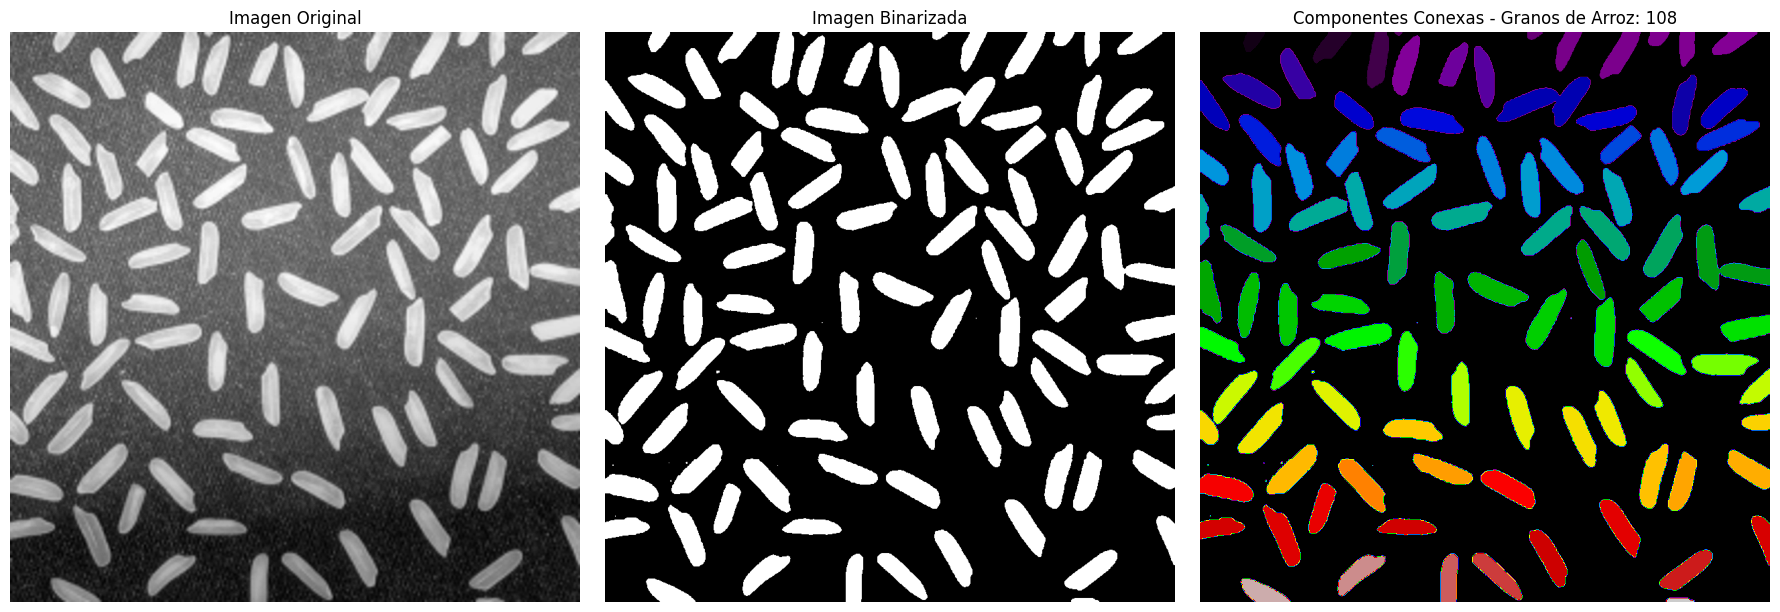

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Cargar la imagen desde una ruta y convertirla a escala de grises
rice_image_path = './imgs/rice.jpg'  # Asegúrate de tener la ruta correcta a la imagen
rice_image = Image.open(rice_image_path).convert('L')  # Convertir a escala de grises
rice_array = np.array(rice_image)  # Convertir la imagen a un array de numpy

def otsu_threshold(region):
    # Calcular el histograma de la región de la imagen
    histogram, bin_edges = np.histogram(region, bins=256, range=(0, 255))
    histogram_normalized = histogram / histogram.sum()
    cumulative_sum = np.cumsum(histogram_normalized)
    cumulative_mean = np.cumsum(histogram_normalized * np.arange(256))
    global_mean = cumulative_mean[-1]

    otsu_threshold = 0
    max_between_class_variance = 0

    for i in range(1, 256):
        probability_class_1 = cumulative_sum[i]
        probability_class_2 = 1 - probability_class_1
        mean_class_1 = cumulative_mean[i] / probability_class_1 if probability_class_1 > 0 else 0
        mean_class_2 = (global_mean - cumulative_mean[i]) / probability_class_2 if probability_class_2 > 0 else 0
        between_class_variance = probability_class_1 * probability_class_2 * (mean_class_1 - mean_class_2) ** 2

        if between_class_variance > max_between_class_variance:
            max_between_class_variance = between_class_variance
            otsu_threshold = i

    return otsu_threshold

# Dividir la imagen en regiones y aplicar el umbral de Otsu a cada una
num_regions = 4  # Número de regiones en cada dimensión
segmented_image = np.zeros_like(rice_array)  # Crear una imagen segmentada vacía

for i in range(num_regions):
    for j in range(num_regions):
        start_x, start_y = i * rice_array.shape[0] // num_regions, j * rice_array.shape[1] // num_regions
        end_x, end_y = (i + 1) * rice_array.shape[0] // num_regions, (j + 1) * rice_array.shape[1] // num_regions
        
        region = rice_array[start_x:end_x, start_y:end_y]
        threshold = otsu_threshold(region)
        segmented_image[start_x:end_x, start_y:end_y] = region > threshold

# Aplicar un algoritmo de componentes conexas sobre la imagen binarizada
labeled_array, num_features = label(segmented_image)

# Graficar la imagen original, binarizada y con componentes conexas lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(rice_image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(segmented_image, cmap='gray')
axes[1].set_title('Imagen Binarizada')
axes[1].axis('off')

axes[2].imshow(labeled_array, cmap='nipy_spectral')
axes[2].set_title(f'Componentes Conexas - Granos de Arroz: {num_features}')
axes[2].axis('off')

plt.tight_layout()
plt.show()
